In [57]:
import pandas as pd
btcMarketPrice = pd.read_csv('btc-market-price.csv', parse_dates=['Date'])
btcMarketPrice.head()

,Date,Price,btc,bitcoin,cryptocurrency
0,2013-11-17,433.53,9,12,0
1,2013-11-18,583.16,9,12,0
2,2013-11-19,583.16,9,12,0
3,2013-11-20,595.00,9,12,0
4,2013-11-21,595.00,9,12,0


In [58]:
googleTrend = pd.read_csv('btc-google-trend.csv')
googleTrend.head()

,Week,btc,bitcoin,cryptocurrency
0,11/17/2013,9,12,0
1,11/18/2013,9,12,0
2,11/19/2013,9,12,0
3,11/20/2013,9,12,0
4,11/21/2013,9,12,0


In [59]:
googleTrend.head()

,Week,btc,bitcoin,cryptocurrency
0,11/17/2013,9,12,0
1,11/18/2013,9,12,0
2,11/19/2013,9,12,0
3,11/20/2013,9,12,0
4,11/21/2013,9,12,0


In [60]:
import matplotlib.pyplot as plt

def comparePlot(data, x, y, frequency):
    fig = plt.figure()
    
    axes1 = fig.add_axes([0.05, 0.2, 1.2, 0.8]) # main axes
    axes2 = fig.add_axes([0.2, 0.5, 0.6, 0.3]) # inset axes

    # main figure
    for i in range(len(y)):
        axes1.plot(data[x], data[y[i]]/data[y[i]].max())

    axes1.legend(loc=2)
    axes1.set_xlabel(x)
    axes1.set_ylabel('Max')

    # insert
    for i in range(len(y)):
        axes2.plot(data[x][-30*frequency:], data[y[i]][-30*frequency:]/data[y[i]][-30*frequency:].max())

    axes2.set_xlabel(x)
    axes2.set_ylabel('Max');
    plt.show()

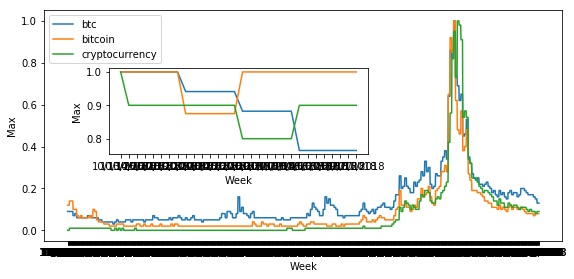

In [61]:
comparePlot(googleTrend, 'Week', ('btc','bitcoin','cryptocurrency'), 1)

In [62]:
googleTrend.shape
#plt.scatter(btcMarketPrice["Price"],googleTrend["btc"])
#plt.show()

(1821, 4)

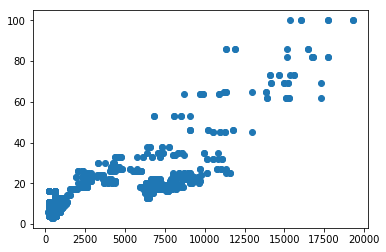

In [65]:
plt.scatter(btcMarketPrice["Price"],btcMarketPrice["btc"])
plt.show()

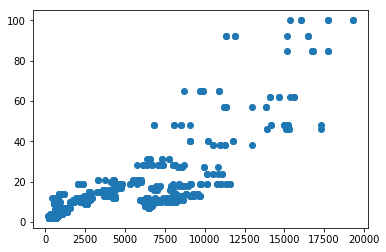

In [66]:
plt.scatter(btcMarketPrice["Price"],btcMarketPrice["bitcoin"])
plt.show()

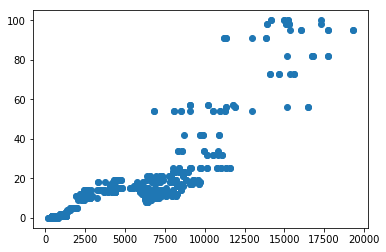

In [67]:
plt.scatter(btcMarketPrice["Price"],btcMarketPrice["cryptocurrency"])
plt.show()

In [68]:
def polynomial_model(param, x): ### Polynome of degree 3
    return param[0] + param[1]*x + param[2]*x**2 + param[3]*x**3

def polynomial_err(param, x, y):
    return y - polynomial_model(param, x)

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
x_data = btcMarketPrice['btc']
y_data = btcMarketPrice['Price']

In [70]:
param0 = [1, 1, 1, 1] 

param1, meta_res = scipy.optimize.leastsq(polynomial_err, param0[:], args = (x_data, y_data))

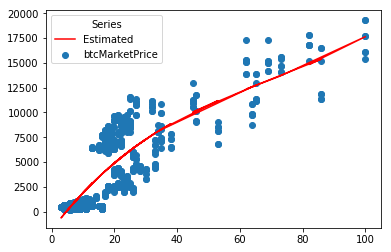

Initial parameters : [1, 1, 1, 1]
Estimated parameters : [-1.84462801e+03  4.14977204e+02 -4.30562650e+00  2.10372446e-02]


In [71]:
y_model = polynomial_model(param1, x_data) 
plt.scatter(x_data,y_data,label='btcMarketPrice')
plt.plot(x_data,y_model,label='Estimated', color = 'Red')
plt.legend(loc='best', title='Series')
plt.show()

print("Initial parameters :", param0)
print("Estimated parameters :", param1)

In [112]:

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
#from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(btcMarketPrice[['btc','bitcoin','cryptocurrency']], btcMarketPrice['Price'], test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1456, 3) (1456,)
(365, 3) (365,)


In [113]:
def polynomialModelN(n, param, x): 
    temp = 0
    for i in range(n):
        temp = temp + param[i]*x**(i)
    return temp

In [114]:
def polynomialError(param, x, y): 
    return y - polynomialModelN(len(param), param, x)

In [115]:
def meanSquareError(true, predicted): 
    delta = true - predicted
    return sum(delta**2)/len(delta)

In [124]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [132]:
#trainTestError(9)

In [133]:
#from sklearn import linear_model
#from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def linReg(X, y, test_ratio = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio)
    
    lm = linear_model.LinearRegression()

    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    
    plt.scatter(y_test, predictions, color = '#EBA911')
    plt.show()
    
    print("R-Square: ", model.score(X_test, y_test))
    print("Mean Square Error: ", meanSquareError(y_test, predictions))
    
    return model

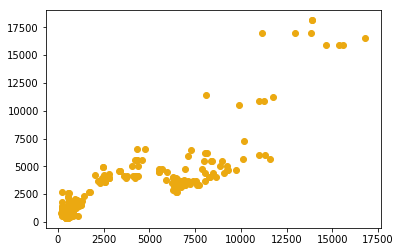

R-Square:  0.7584444609284677
Mean Square Error:  2906839.23599804


In [134]:
y = btcMarketPrice['Price']
X = btcMarketPrice[['bitcoin', 'btc','cryptocurrency']]

test = linReg(X, y)

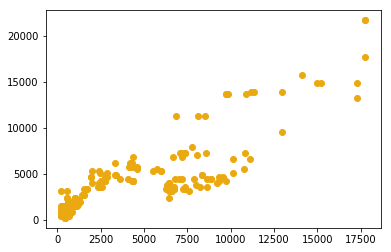

R-Square:  0.7728897208609112
Mean Square Error:  3108078.0838436377


In [135]:
y = btcMarketPrice['Price']
X = btcMarketPrice[['btc']]

test = linReg(X, y)

In [136]:
#y = np.sign(btcMarketPrice['Price'])
#y = [1 if y>=0 else 0 for y in y]
#X = btcMarketPrice[btcMarketPrice.columns.difference(['Price', 'bitcoin','Date'])]

#test = logReg(X, y)

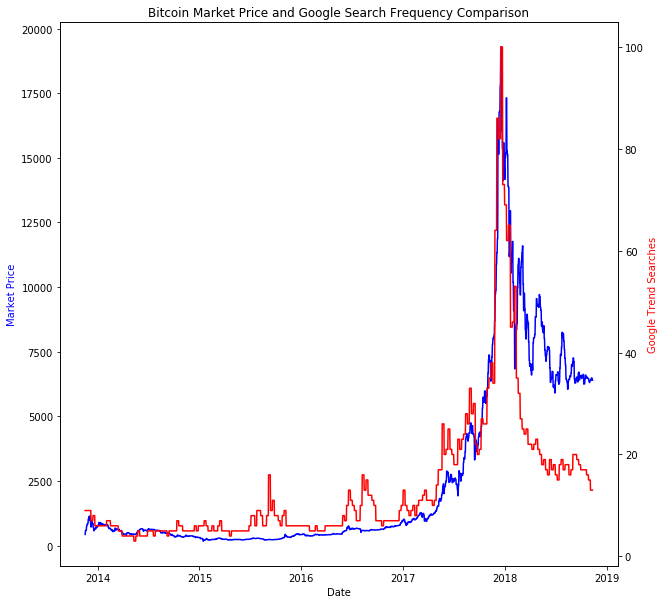

In [137]:
x = btcMarketPrice['Date']
y1 = btcMarketPrice['Price']
y2 = btcMarketPrice['btc']
fig, ax1 = plt.subplots(figsize=(10,10))
plt.title("Bitcoin Market Price and Google Search Frequency Comparison")
ax2 = ax1.twinx()
ax1.plot(x, y1, 'b-')
ax2.plot(x, y2, 'r-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Market Price', color='b')
ax2.set_ylabel('Google Trend Searches', color='r')
plt.savefig("TrendTopicComparison", bbox_inches="tight")
plt.show()

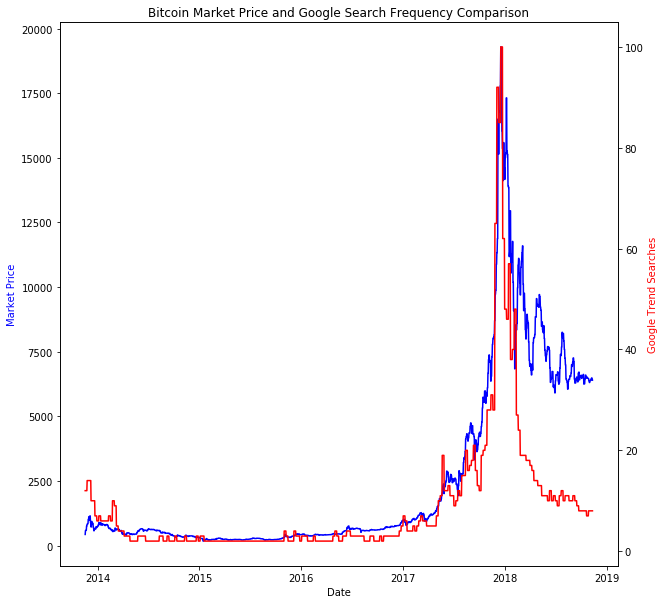

In [138]:
x = btcMarketPrice['Date']
y1 = btcMarketPrice['Price']
y2 = btcMarketPrice['bitcoin']
fig, ax1 = plt.subplots(figsize=(10,10))
plt.title("Bitcoin Market Price and Google Search Frequency Comparison")
ax2 = ax1.twinx()
ax1.plot(x, y1, 'b-')
ax2.plot(x, y2, 'r-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Market Price', color='b')
ax2.set_ylabel('Google Trend Searches', color='r')
plt.savefig("TrendTopicComparison", bbox_inches="tight")
plt.show()

In [130]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# define regression function
def regression(X_train, X_test, y_train, y_test):
    Regressor = {
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=500),
        'ExtraTrees Regressor': ExtraTreesRegressor(n_estimators=500, min_samples_split=5),
        'Bayesian Ridge': BayesianRidge(),
        'Elastic Net CV': ElasticNetCV()
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train)
    
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, clf.predict(X_test)):.2f}')
        print(f'MSE: {mean_squared_error(y_test, clf.predict(X_test)):.2f}')
        print()

In [139]:
print('Bitcoin (BTC):')
#X_BTC = BTC(['daily_avg_After_Month','symbol','daily_avg'], axis=1)
#y_BTC = BTC.dropna()['daily_avg_After_Month']
#X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = train_test_split(X_BTC, y_BTC, test_size=0.2, random_state=43)
#X_forecast_BTC =  BTC.tail(30).drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)
regression(X_train, X_test, y_train, y_test)

Bitcoin (BTC):
Random Forest Regressor
R2: 0.99
MAE: 165.24
MSE: 115906.16

Gradient Boosting Regressor
R2: 0.99
MAE: 177.22
MSE: 125257.46

ExtraTrees Regressor
R2: 0.99
MAE: 164.51
MSE: 115071.38

Bayesian Ridge
R2: 0.81
MAE: 1089.36
MSE: 2547252.34

Elastic Net CV
R2: 0.79
MAE: 1201.69
MSE: 2853464.72



In [213]:
# define prediction function
X_forecast_BTC=btcMarketPrice[['Price','btc','bitcoin']].tail(30)
def prediction(name, X, y, X_forecast):
    model = ExtraTreesRegressor(n_estimators=500, min_samples_split=100)
    model.fit(X, y)
    target = model.predict(X_forecast)
    return target
forecasted_BTC = prediction('BTC', btcMarketPrice[['btc','bitcoin','cryptocurrency']], btcMarketPrice['Price'], X_forecast_BTC)

In [214]:
forecasted_BTC

array([6479.79801739, 6479.79801739, 6479.79801739, 6479.79801739,
       6479.79801739, 6479.79801739, 6479.79801739, 6479.79801739,
       6237.05174213, 6237.05174213, 6237.05174213, 6237.05174213,
       6237.05174213, 6237.05174213, 6237.05174213, 6461.90718866,
       6461.90718866, 6461.90718866, 6461.90718866, 6461.90718866,
       6461.90718866, 6461.90718866, 6454.82996064, 6454.82996064,
       6454.82996064, 6454.82996064, 6454.82996064, 6454.82996064,
       6454.82996064, 6454.82996064])

In [215]:
# define index for next 30 days
import datetime as dt
#last_date='11/11/2018 0:00'
import time
#now = datetime.datetime.now()
#now
#print (time.strftime("%H:%M:%S"))
#modified_date = now + dt.timedelta(days=1)
new_date = pd.date_range('11/12/2018',periods=30,freq='D')
forecasted_BTC = pd.DataFrame(forecasted_BTC, columns=['Price'], index=new_date)

In [216]:
forecasted_BTC

,Price
2018-11-12,6479.798017
2018-11-13,6479.798017
2018-11-14,6479.798017
2018-11-15,6479.798017
2018-11-16,6479.798017
2018-11-17,6479.798017
2018-11-18,6479.798017
2018-11-19,6479.798017
2018-11-20,6237.051742
2018-11-21,6237.051742


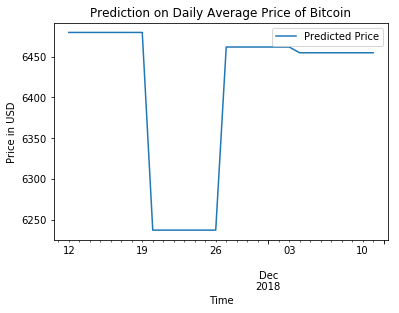

In [217]:
plt.figure()
(forecasted_BTC['Price']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Bitcoin')
plt.legend()
plt.show()

#### This work was done with Bitcoins price data till 11-Nov-2018 and Google trends data till 4-Nov-2018.

#### It predicted price of Bit coin to be 6479.798017 USD on 12-Nov-2018.
#### But Current Price of Bitcoin on 12-Nov-2018 according to Google Finance was 6,343.34 United States Dollar.